In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
import sys
import pandas as pd

import pickle
import glob

In [442]:
#/save-7352.pickle
filename = "save-90.pickle"
filename = "save-nn-050419_235659_727093-1-trial0.pickle"
filename = "save-nn-050519_004752_345541-2349-trial1.pickle"

# no bn
filename = "save-nn-050519_105123_774343-24-trial0.pickle"

# small scale. with bn (and 10 iterations)
# filename = "save-nn-050519_112116_825855-24-trial0.pickle"

# small scale, with bn
# filename = "save-nn-050519_103848_565292-24-trial0.pickle"

# With gaussian, bn, 50-75-100-125 (currently figure 4 (bottom))
filename = "save-nn-050519_110534_065495-24-trial0.pickle"

# Small scale with bn (and with delta_ws)
#filename = "save-nn-050819_223622_027016-23-trial0.pickle"
#filename = "save-nn-050819_223622_027016-23-trial1.pickle"

# new results (after fixing H issue in bn)
# with bn and lr = 0.2
# filename = "save-nn-051219_160404_596935-24-trial0.pickle"
# no bn and lr = 0.2 (after fixing H issue)
#filename = "save-nn-051219_161154_388674-24-trial0.pickle"
# no bn and lr = 0.1 (after fixing H issue) (currently figure 4 (top))
filename = "save-nn-051219_161511_337238-24-trial0.pickle"

# with bn and lr = 0.1 (reduce bn.eps for computing Jacobian)
# filename = "save-nn-051219_163525_479641-24-trial0.pickle"

# cifar10 FC with bn. 
# filename = "save-nn-051219_172356_324962-24-trial4.pickle"
# cifar10 FC without bn
# filename = "save-nn-051219_172336_515583-24-trial4.pickle"

# random with [64] * 4 filters. with bn
# filename = "save-nn-051219_202436_179479-24-trial0.pickle"

# random CNN with [64] * 4 filters. with bn
# filename = "save-nn-051219_202436_179479-24-trial0.pickle"
# random CNN with [64] * 4 filters, without bn
# filename = "save-nn-051219_202639_562114-24-trial0.pickle"

# H visualization with bias term included. 
# filename = "save-nn-051219_235158_592642-24-trial0.pickle"

stats = pickle.load(open(os.path.join("/private/home/yuandong/dl_theory2/results", filename), "rb"))

#stats = pickle.load(open("/private/home/yuandong/dl_theory2/save-nn-234-trial1.pickle", "rb"))
#stats = pickle.load(open("/private/home/yuandong/dl_theory2/save-nn-714-trial0.pickle", "rb"))

print(len(stats["data"]))
print(stats["args"])
print()
# print(stats["cmdline"])
stats = stats["data"]

41
Namespace(batchsize=64, bn=False, bn_affine=False, cross_entropy=False, d_output=0, data_d=20, data_std=10.0, dataset='gaussian', eval_batchsize=64, init_multi=4, json_output=False, ks=[10, 15, 20, 25], load_teacher=None, lr={0: 0.1}, momentum=0.0, no_bias=False, node_multi=10, normalize=False, num_epoch=40, num_iter=30000, num_trial=5, perturb=None, same_dir=False, same_sign=False, save_dir='./', seed=24, signature='051219_161511_337238', stats_H=True, stats_w=True, teacher_bn=False, teacher_bn_affine=False, use_cnn=False, weight_decay=0)



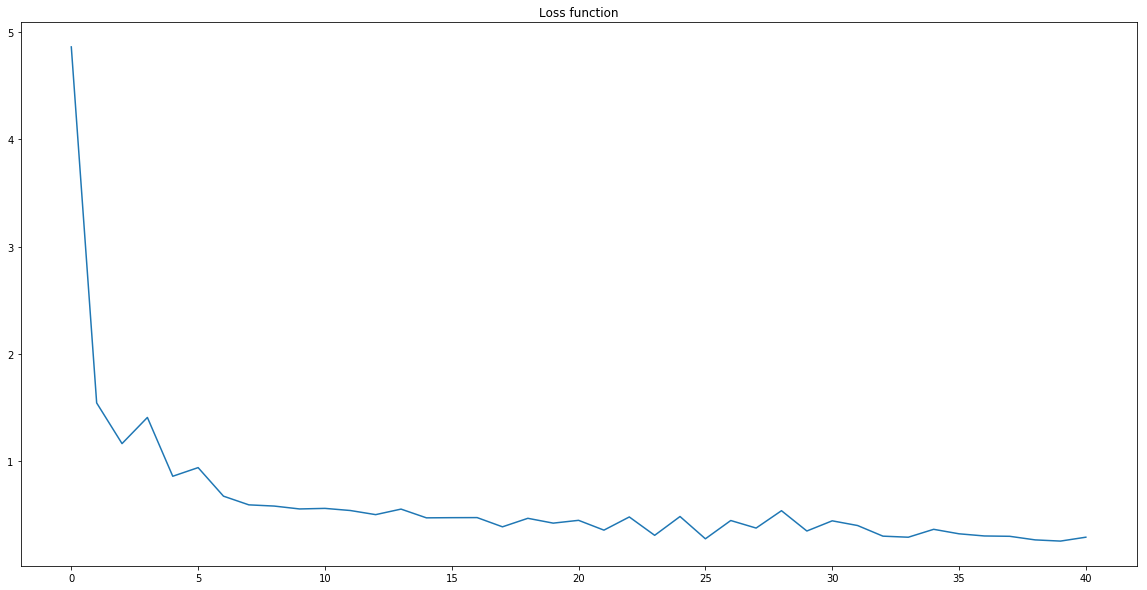

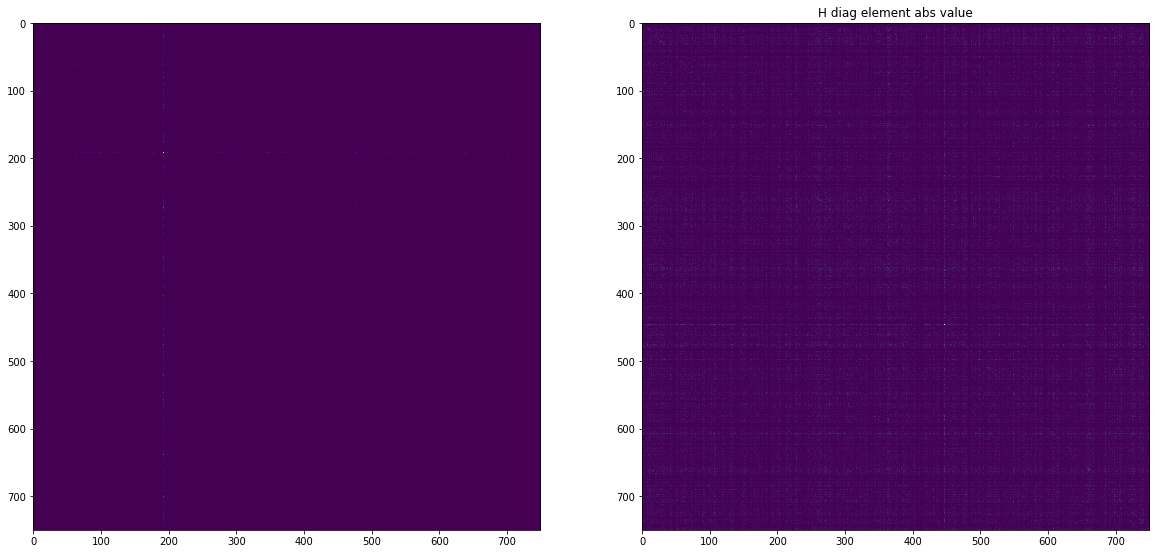

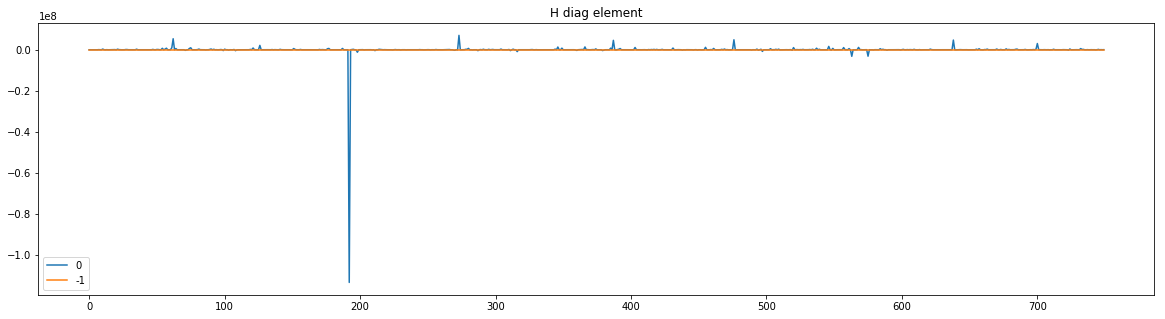

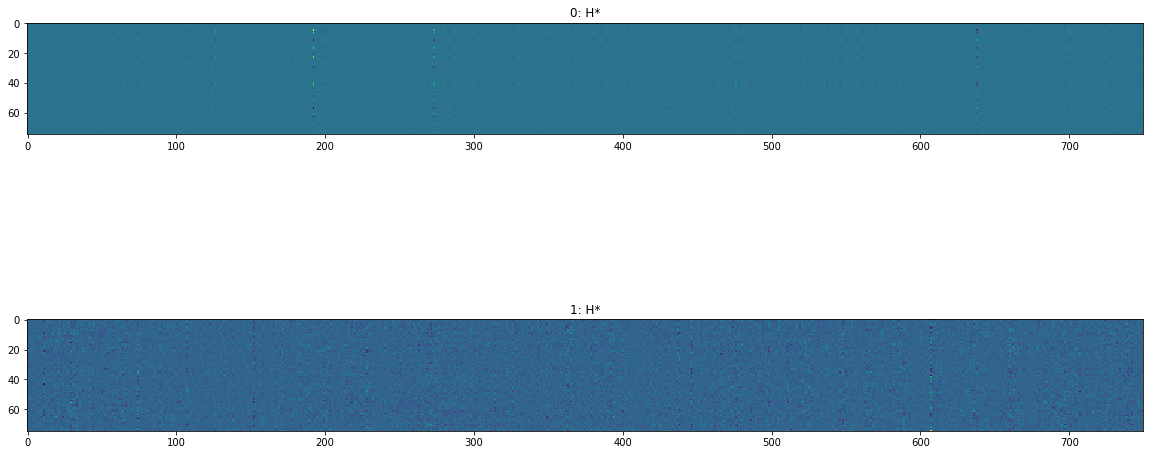

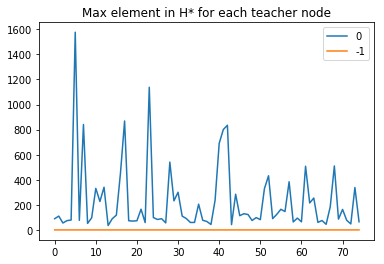

In [433]:
plt.figure(figsize=(20, 10))
plt.plot([ s["eval_loss"] for s in stats ])
plt.title("Loss function")
plt.show()

layer = 1
#iterations = [0, 10, 20, 30, 40, 50, 60, 70, -1]
iterations = [0, -1]

plt.figure(figsize=(20, 10))
for i, it in enumerate(iterations):
    plt.subplot(1, len(iterations), i + 1)
    plt.imshow(stats[it]["Hs"][layer].abs())
plt.title('H diag element abs value')
plt.show()

plt.figure(figsize=(20, 5))
for i, it in enumerate(iterations): 
    diag_elem = stats[it]["Hs"][layer].diag().numpy()
    plt.plot(diag_elem, label=str(it))
# plt.axis([0, len(diag_elem), 0, 1])
plt.legend()
plt.title('H diag element')
plt.show()
    
plt.figure(figsize=(20, 10))
for i, it in enumerate(iterations):
    plt.subplot(len(iterations), 1, i + 1)
    H_s = stats[it]["Hs_s"][layer]
    plt.imshow(H_s.t())
    plt.title(f'{i}: H*')
plt.show()
    
for i, it in enumerate(iterations):   
    H_s = stats[it]["Hs_s"][layer]
    plt.plot(H_s.max(0)[0].numpy(), label=str(it))
plt.title('Max element in H* for each teacher node')
plt.legend()
plt.show()

Layer: 0 it: 000  H*_uu: 0.0005655011754065762, ratio: 1.0
Layer: 0 it: -01  H*_uu: 0.060651165143274, ratio: 107.25205849425133
Layer: 1 it: 000  H*_uu: 0.0013471731200639546, ratio: 2.3822640493989824
Layer: 1 it: -01  H*_uu: 0.07355236692454505, ratio: 130.06580732862912
Layer: 2 it: 000  H*_uu: 0.004318524812758326, ratio: 7.636632779151082
Layer: 2 it: -01  H*_uu: 0.0479034562835994, ratio: 84.70973778110793
Layer: 3 it: 000  H*_uu: 0.016066128628903834, ratio: 28.410424818927794
Layer: 3 it: -01  H*_uu: 0.06429012888933588, ratio: 113.68699427214003

Layer: 0 it: 000  H*_ur: 0.0006997149355491185, ratio: 1.0
Layer: 0 it: -01  H*_ur: 0.022453545722391093, ratio: 32.08956187961048
Layer: 1 it: 000  H*_ur: 0.0014482428231895395, ratio: 2.069761197898392
Layer: 1 it: -01  H*_ur: 0.02040159893446146, ratio: 29.15701508993917
Layer: 2 it: 000  H*_ur: 0.003618994968103729, ratio: 5.172099070979003
Layer: 2 it: -01  H*_ur: 0.015756406291889465, ratio: 22.518322092873778
Layer: 3 it: 000 

/private/home/yuandong/miniconda3/envs/go10/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


saving beta_s_reorder
saving H_reorder
saving beta_reorder


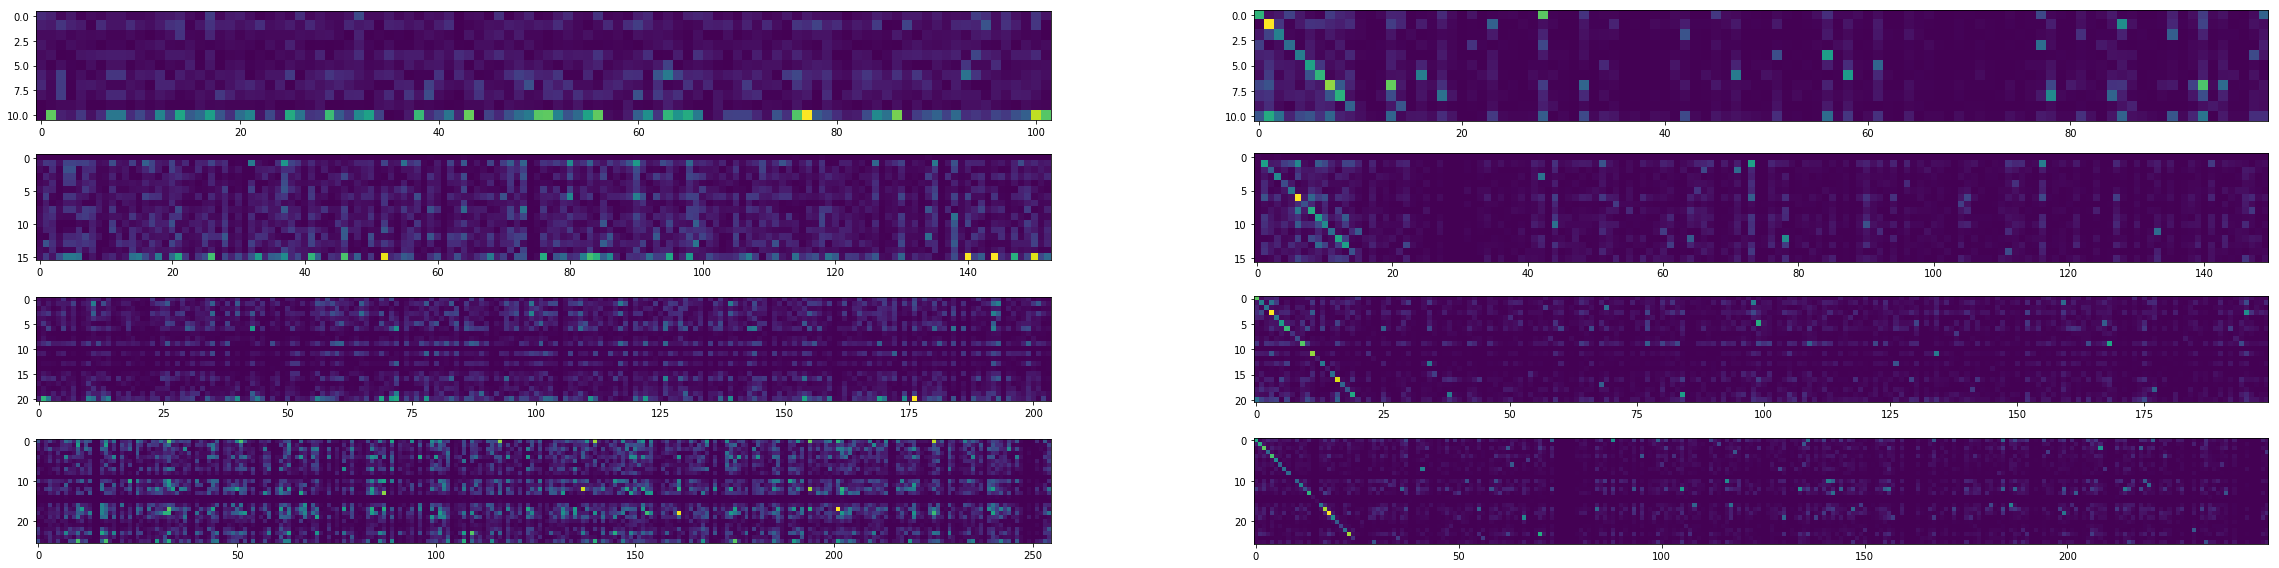

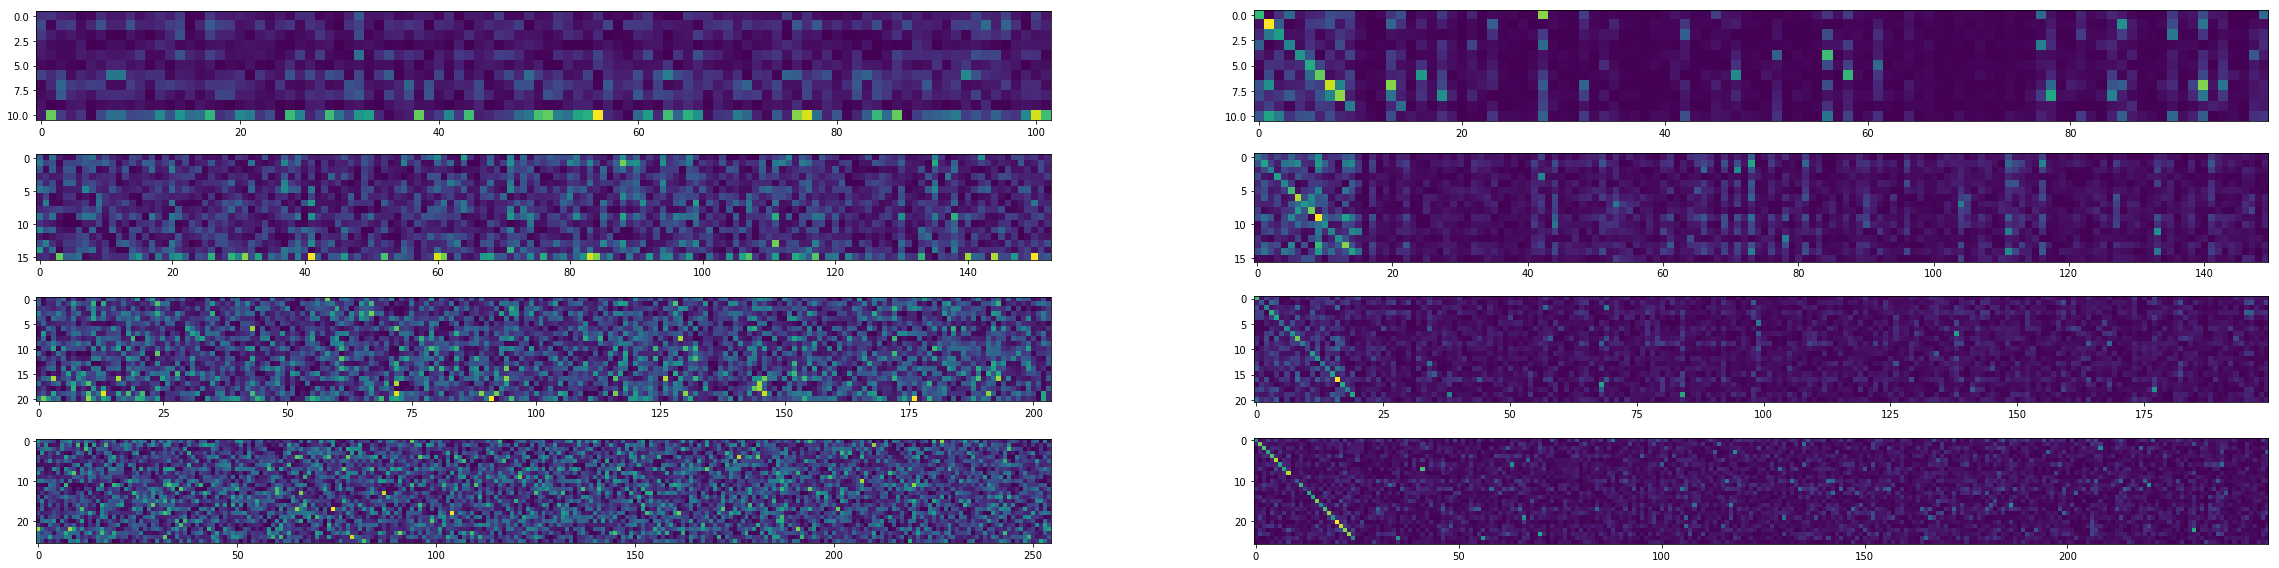

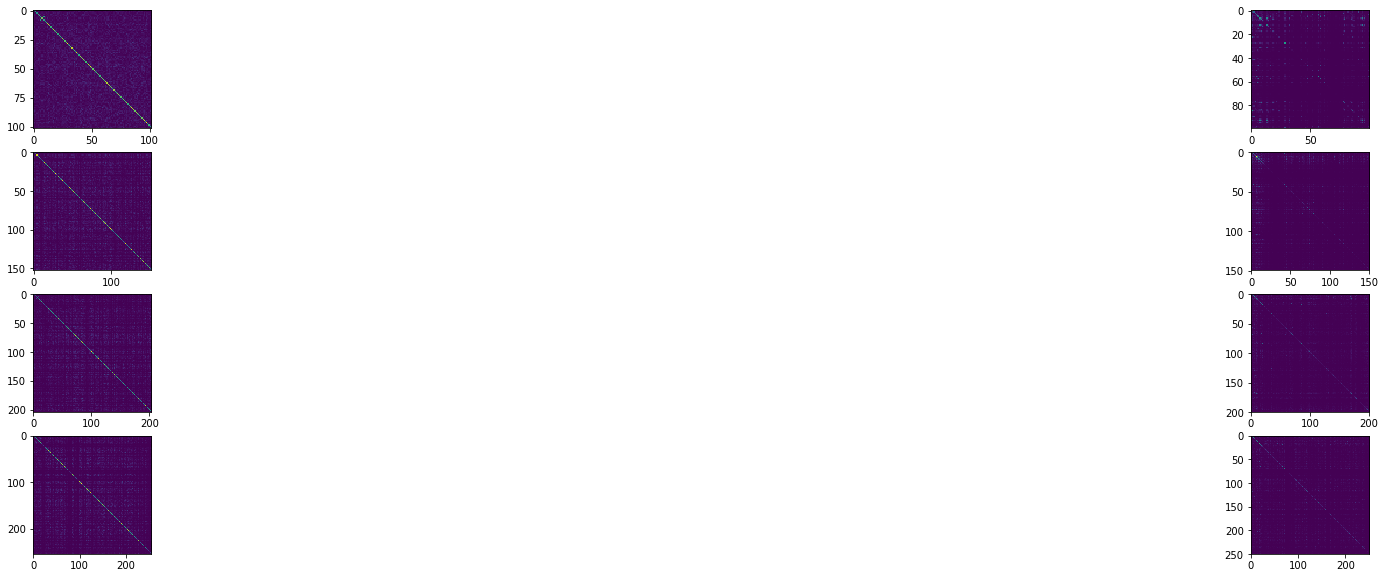

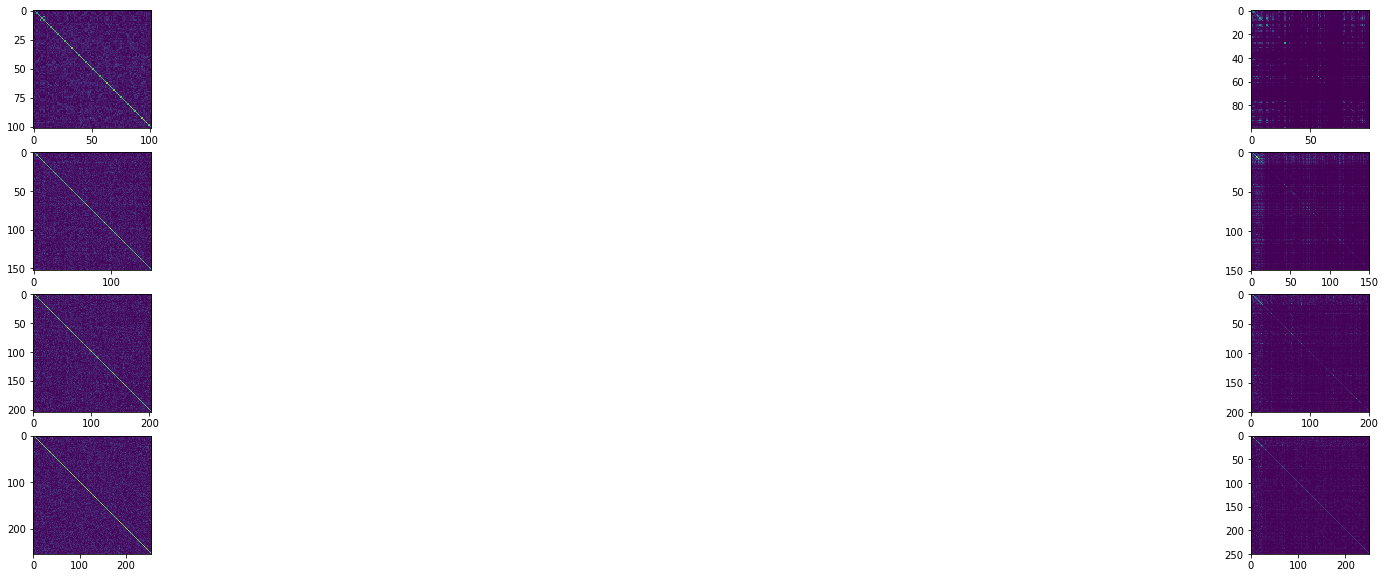

In [427]:
import math
import torch
from collections import defaultdict

def op_norm(A):
    evs = torch.eig(A.t() @ A)
    return math.sqrt(evs[0][:, 0].max().item())

def f_norm(A):
    return A.norm().item()

first_H_s_uu_norm = None
first_H_s_ur_norm = None

first_H_uu_norm = None
first_H_ur_norm = None
first_H_rr_norm = None

    
norm_func = op_norm
# norm_func = f_norm

msg_entries = defaultdict(lambda : list())
graph_entries = defaultdict(lambda : list())

for layer in range(0, 4):
    for i, it in enumerate(iterations):
        s = stats[it]
        n_student_node, n_teacher_node = s["corrs"][layer].size()

        best_student_indices = list(s["corrs"][layer].max(0)[1].numpy())

        # best_student_indices = list(set(list(s["corrs"][layer].max(0)[1].numpy())))
        # best_student_indices = list(set(list(s["corrs"][layer].sort(0, descending=True)[1][:1,:].view(-1).numpy())))
        remain_student_indices = [ i for i in range(n_student_node) if i not in best_student_indices ]
        n_u = len(best_student_indices)
        n_r = len(remain_student_indices)
        
        reorder = best_student_indices + remain_student_indices

        H = s["Hs"][layer]
        H_s = s["Hs_s"][layer]
        graph_entries[f'H_s_reorder'].append(H_s[reorder, :].abs().t())
        
        if "betas" in s:
            beta = s["betas"][layer]
            beta_s = s["betas_s"][layer]
            graph_entries[f'beta_s_reorder'].append(beta_s[reorder, :].abs().t())

        H_s_uu_norm = norm_func(H_s[best_student_indices, :]) / math.sqrt(n_u * n_teacher_node)
        H_s_ur_norm = norm_func(H_s[remain_student_indices, :]) / math.sqrt( n_r * n_teacher_node )

        if first_H_s_uu_norm is None:
            first_H_s_uu_norm = H_s_uu_norm
            first_H_s_ur_norm = H_s_ur_norm

        uu_ratio = H_s_uu_norm / first_H_s_uu_norm
        ur_ratio = H_s_ur_norm / first_H_s_ur_norm

        prompt = f"Layer: {layer} it: {it:#03d} "
        msg_entries["H*_uu"].append(f"{prompt} H*_uu: {H_s_uu_norm}, ratio: {uu_ratio}")
        msg_entries["H*_ur"].append(f"{prompt} H*_ur: {H_s_ur_norm}, ratio: {ur_ratio}")
        msg_entries["H*_ratio"].append(f"{prompt} H*_ratio = |H*_ur| / |H*_uu| = {ur_ratio / uu_ratio}")

        count += 1
        H_reordered = H[reorder, :][:, reorder]
        graph_entries["H_reorder"].append(H_reordered.abs())
        
        if "betas" in s:
            beta_reordered = beta[reorder, :][:, reorder]
            graph_entries["beta_reorder"].append(beta_reordered.abs())

        H_uu_norm = norm_func(H_reordered[:n_u, :n_u]) / n_u
        H_ur_norm = norm_func(H_reordered[n_u:, :n_u]) / math.sqrt(n_u * n_r)
        H_rr_norm = norm_func(H_reordered[n_u:, n_u:]) / n_r

        if first_H_uu_norm is None:
            first_H_uu_norm = H_uu_norm
            first_H_ur_norm = H_ur_norm
            first_H_rr_norm = H_rr_norm

        uu_ratio = H_uu_norm / first_H_uu_norm
        ur_ratio = H_ur_norm / first_H_ur_norm
        rr_ratio = H_rr_norm / first_H_rr_norm

        msg_entries["H_uu"].append(f"{prompt} H_uu: {H_uu_norm}, ratio: {uu_ratio}")
        msg_entries["H_ur"].append(f"{prompt} H_ur: {H_ur_norm}, ratio: {ur_ratio}")
        msg_entries["H_rr"].append(f"{prompt} H_rr: {H_rr_norm}, ratio: {rr_ratio}")
        msg_entries["H_ratio"].append(f"{prompt} H_ratio = uu_ratio * rr_ratio / ur_ratio^2 = {uu_ratio * rr_ratio / ur_ratio**2}")

for k, v in msg_entries.items():
    for vv in v:
        print(vv)
    print()
    
for k, v in graph_entries.items():
    plt.figure(figsize=(40, 10))
    for layer in range(0, 4):
        for i, vv in enumerate(v):
            plt.subplot(4, len(iterations), i + 1)
            plt.imshow(vv)
    print("saving %s" % k)
    plt.savefig(k + ".pdf")

saving H_beta


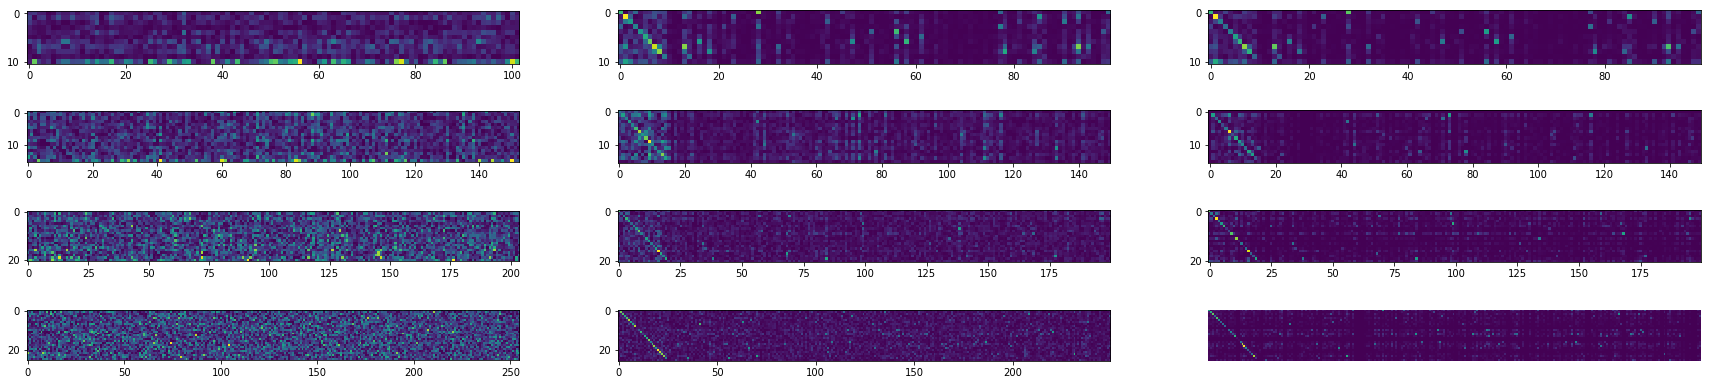

In [428]:
# Plot hybrid beta and H
plt.figure(figsize=(30, 7))
Hs = graph_entries['H_s_reorder']
betas = graph_entries['beta_s_reorder']
count = 1

for layer in range(0, 4):
    plt.subplot(4, 3, count)
    plt.imshow(betas[2 * layer])
    plt.subplot(4, 3, count + 1)
    plt.imshow(betas[2 * layer + 1])
    plt.subplot(4, 3, count + 2)
    plt.imshow(Hs[2 * layer + 1])
    count += 3
    
plt.axis('off')
print("saving H_beta")
plt.savefig("H_beta.pdf")

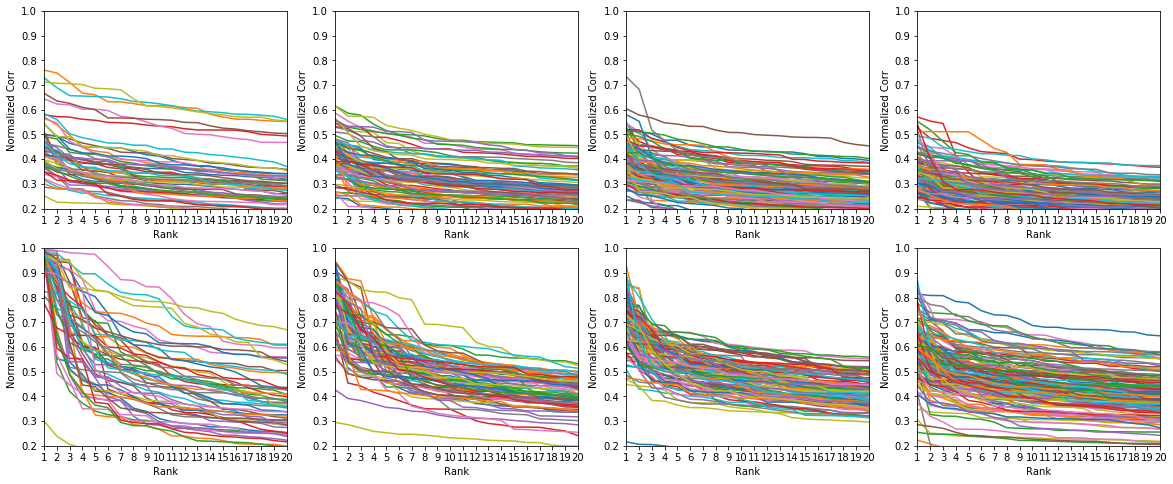

In [402]:
count = 1
plt.figure(figsize=(20, 8))
for it in (0, -1):
    for layer in range(4):
        plt.subplot(2, 4, count)
        count += 1
        sorted_corrs = stats[it]["corrs"][layer].sort(0)[0]
        n_student_node, n_teacher_node = sorted_corrs.size()
        
        last_n = 20 #int(n_student_node * 0.1)
        x = range(1, last_n + 1)

        for i in range(n_teacher_node):
            y = list(sorted_corrs[-last_n:,i].numpy())[::-1]
            plt.plot(x, y)
        plt.axis([1, last_n, 0.2, 1])
        plt.xlabel('Rank')
        plt.ylabel('Normalized Corr')
        plt.xticks(x)
        #plt.title(f'Layer {layer}: {"before" if it == 0 else "after"} optimization')
# plt.show()
plt.savefig('correlation.pdf')

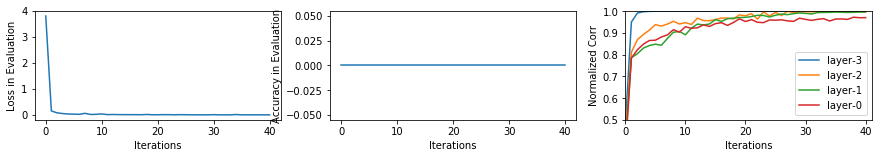

In [443]:
#count = 1
plt.figure(figsize=(15, 2))    
plt.subplot(1, 3, 1)
losses = np.array([s["eval_loss"] for s in stats])
accuracies = np.array([s["eval_accu"] for s in stats])
plt.plot(losses)
plt.xlabel('Iterations')
plt.ylabel('Loss in Evaluation')

plt.subplot(1, 3, 2)
plt.plot(accuracies)
plt.xlabel('Iterations')
plt.ylabel('Accuracy in Evaluation')

plt.subplot(1, 3, 3)
for layer in range(4):
    corrs = np.zeros(len(stats))
    for i, s in enumerate(stats):
        sorted_corrs = s["corrs"][layer].sort(0)[0]
        max_corrs = sorted_corrs[-1,:]
        corrs[i] = max_corrs[max_corrs > 0.1].mean().item()
        
    plt.plot(corrs, label=f"layer-{3-layer}")

plt.axis([0, len(stats), 0.5, 1])
plt.xlabel('Iterations')
plt.ylabel('Normalized Corr')
plt.legend()

plt.savefig('correlation_time.pdf')

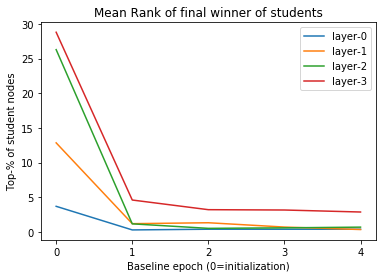

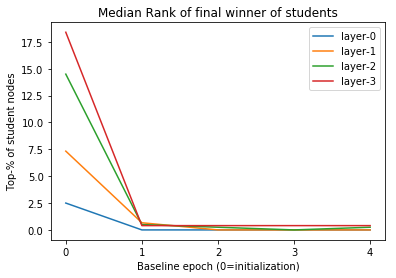

In [444]:
mean_top_percents = np.zeros((5, 4))
median_top_percents = np.zeros((5, 4))

for baseline_it in range(5):
    for layer in range(4):
        init_sorted_indices = stats[baseline_it]["corrs"][layer].sort(0, descending=True)[1]
        n_student_node, n_teacher_node = init_sorted_indices.size()

        # Make an index map. 
        init_index_map = np.zeros((n_student_node, n_teacher_node))
        for i in range(n_teacher_node):
            init_index_map[init_sorted_indices[:,i],i] = range(n_student_node)

        # Final state. 
        final_sorted_indices = stats[-1]["corrs"][layer].sort(0, descending=True)[1]

        # Average rank:
        ranks = np.zeros(n_teacher_node)
        for i in range(n_teacher_node):
            ranks[i] = init_index_map[final_sorted_indices[0, i], i]

        mean_top_percent = np.mean(ranks)/n_student_node*100
        median_top_percent = np.median(ranks)/n_student_node*100

        # print(f"Layer-{layer}: mean top-rank: {mean_top_percent:#02f}%, median top-rank: {median_top_percent:#02f}%")
        mean_top_percents[baseline_it, layer] = mean_top_percent
        median_top_percents[baseline_it, layer] = median_top_percent
        
for layer in range(4):
    plt.plot(mean_top_percents[:,layer], label=f'layer-{layer}')
    
plt.title('Mean Rank of final winner of students')
plt.ylabel('Top-% of student nodes')
plt.xticks([0, 1, 2, 3, 4])
plt.xlabel('Baseline epoch (0=initialization)')
plt.legend()
plt.show()

for layer in range(4):
    plt.plot(median_top_percents[:,layer], label=f'layer-{layer}')
    
plt.title('Median Rank of final winner of students')
plt.ylabel('Top-% of student nodes')
plt.xticks([0, 1, 2, 3, 4])
plt.xlabel('Baseline epoch (0=initialization)')
plt.legend()

In [304]:
ranks

array([ 307.,  873., 1089.,  469.,  844., 1125.,  586.,  412.,  159.,
        778.,  739.,  839.,  383.,  497., 1056.,  536.,  449.,  911.,
        907.,  899., 1249.,  799., 1185.,   97.,  339.,   85.,  813.,
       1224.,  568.,  905.,  810.,  332.,  946.,  345., 1102.,  504.,
        278.,  503., 1046.,  874., 1058.,  682.,  791.,  551., 1126.,
        998., 1206.,  646., 1240., 1051., 1002., 1060.,  996.,  989.,
        956.,  930., 1033., 1249., 1243., 1211.,  325., 1084., 1191.,
        898.,  368.,  648.,  636., 1229.,  141., 1138., 1115.,  814.,
       1237., 1089., 1186., 1212.,  995.,  282.,  242.,  827.,  882.,
        823.,  855.,  380.,  858., 1223., 1215.,  820., 1030., 1155.,
       1229.,  932., 1245.,  141., 1249.,   30.,  365.,  941.,  632.,
       1155.,  883., 1228.,  454., 1016.,  894., 1160., 1224.,  985.,
        580.,  798.,  288., 1015.,  993.,  687., 1116.,  787.,  930.,
        997., 1142., 1217.,  500.,  499., 1234.,  863.,  951.])

In [69]:
b = list(set(list(s["corrs"][layer].sort(0, descending=True)[1][:1,:].view(-1).numpy())))

In [144]:
x

[75, 74, 73, 72, 71, 70, 69]

In [234]:
stats[0].keys()

dict_keys(['Hs', 'Hs_s', 'betas', 'betas_s', 'eval_loss', 'corrs'])

In [78]:
b

[1090,
 739,
 164,
 1574,
 1528,
 1640,
 718,
 111,
 944,
 1169,
 1618,
 83,
 1236,
 312,
 90,
 88,
 732,
 189]

In [79]:
s["corrs"][layer].max(0)[1]

tensor([ 732, 1574,   83, 1749,   90,  312,  718, 1618,  189,  111,  739, 1574,
          88,  164, 1749, 1749, 1749, 1090, 1528, 1640, 1749, 1749, 1749, 1236,
         944])

In [80]:
s["corrs"][layer].sort(0, descending=True)[1][:1,:]

tensor([[ 732, 1574,   83, 1169,   90,  312,  718, 1618,  189,  111,  739, 1574,
           88,  164, 1169, 1169, 1169, 1090, 1528, 1640, 1169, 1169, 1169, 1236,
          944]])

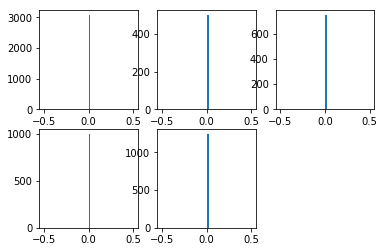

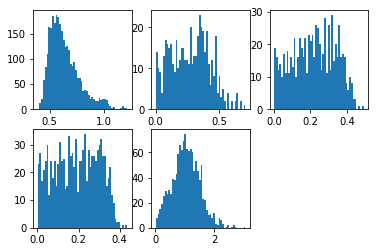

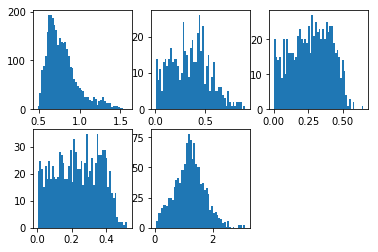

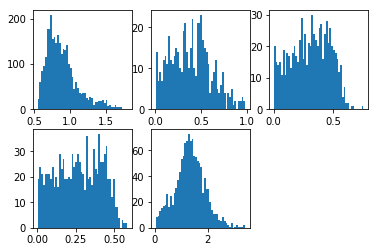

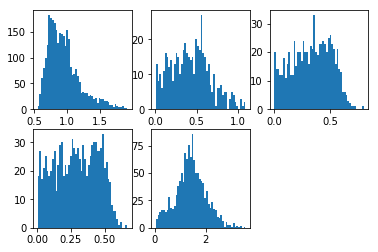

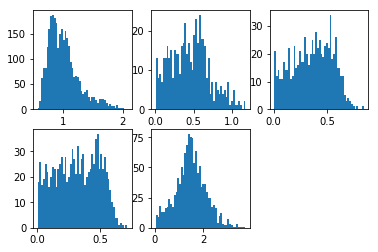

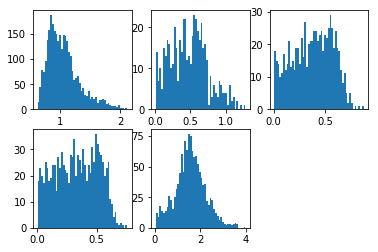

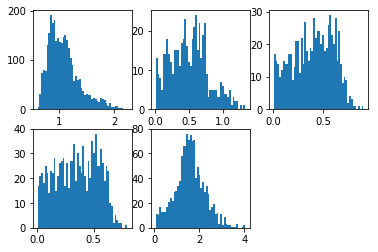

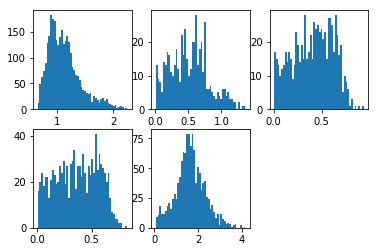

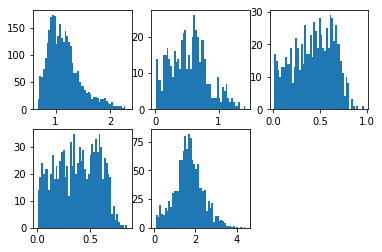

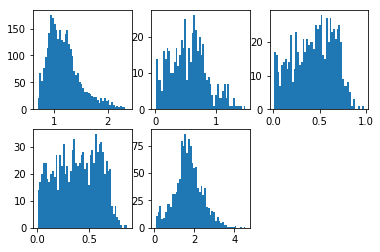

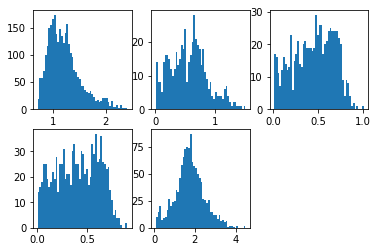

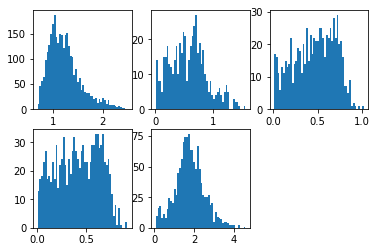

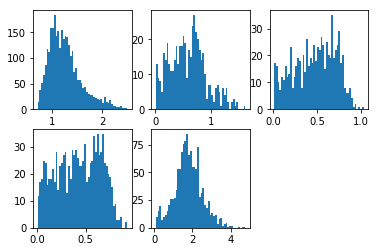

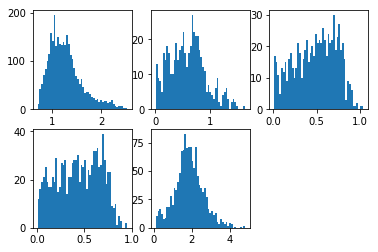

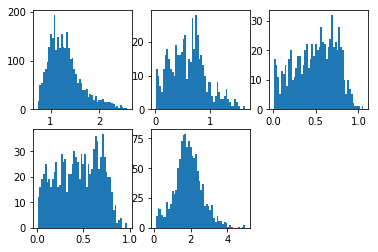

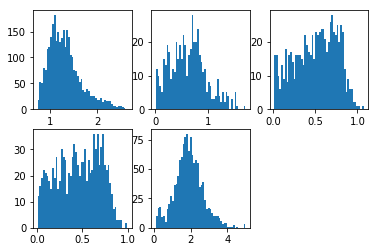

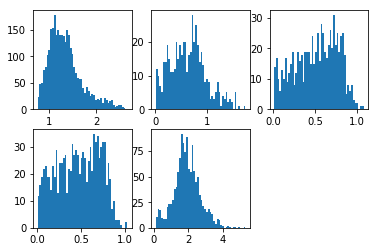

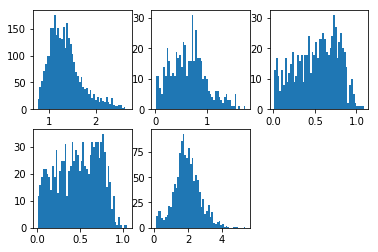

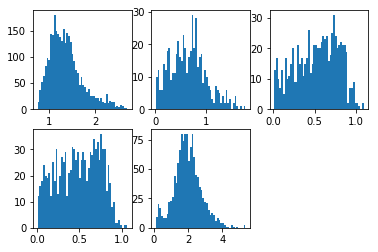

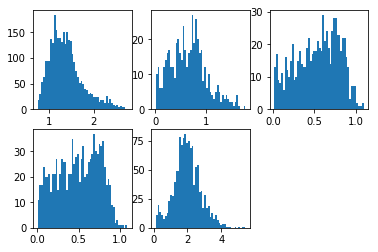

In [348]:
for s in stats:
    count = 1
    delta_ws = s["delta_ws_rel"]
    for delta_w in delta_ws:
        plt.subplot(2, 3, count)
        count += 1
        plt.hist(delta_w.cpu(), 50)
        #plt.title(f'max={delta_w_rel.cpu().max():#02f}')
    plt.show()
    